In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv(r"../data/housing.data", sep=' +', engine='python', header=None, names=cols)

CRIM - współczynnik przestępczości w mieście

ZN - odsetek "dużych działek" - powyzej 2500m2

INDUS - odsetek terenów industrialnych w mieście

CHAS - jeśli teren znajduje się przy rzece Charles -1, w pozostałych przypadkach 0

NOX - stężenie tlenków azotu

RM - średnia ilość pomieszczeń w budynku

AGE - odsetek "starych budynków" - powstałych prez 1940 r.

DIS - ważona odległość od urzędów pracy w Bostonie

RAD - wskaźnik dostępności do głównych dróg

TAX - wartość podatku od nieruchomości liczona od 10 tys. dolarów

PTRATIO - stosunek liczby uczniów na nauczycieli w mieście

B - odsetek osób pochodzenia afroamerykańskiego

LSTAT - odsetek mieszkańców zaliczany do ubogich

MEDV - mediana wartości domów z danego terenu (w tys. dolarów)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


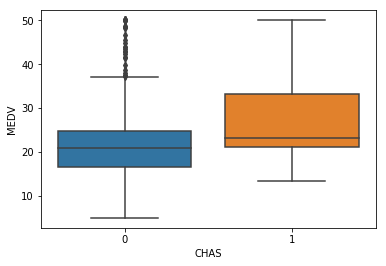

In [5]:
sns.boxplot(x=data['CHAS'], y=data['MEDV'])

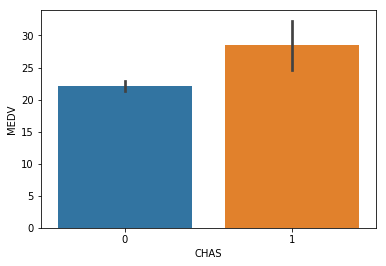

In [6]:
sns.barplot(x=data['CHAS'], y=data['MEDV'])

In [7]:
corr = data.corr()

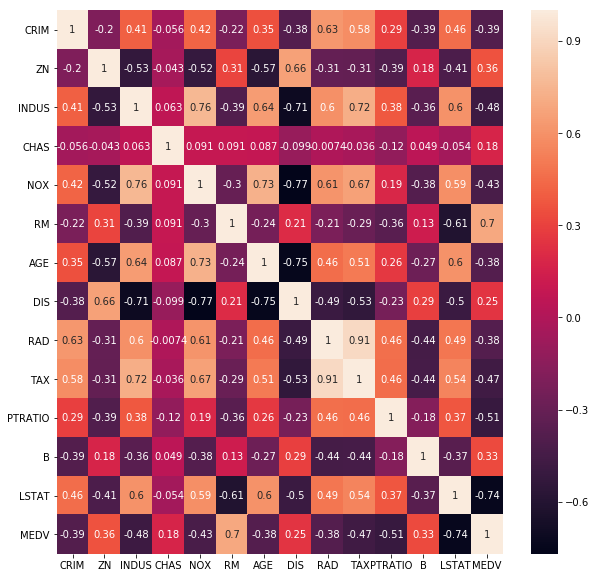

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

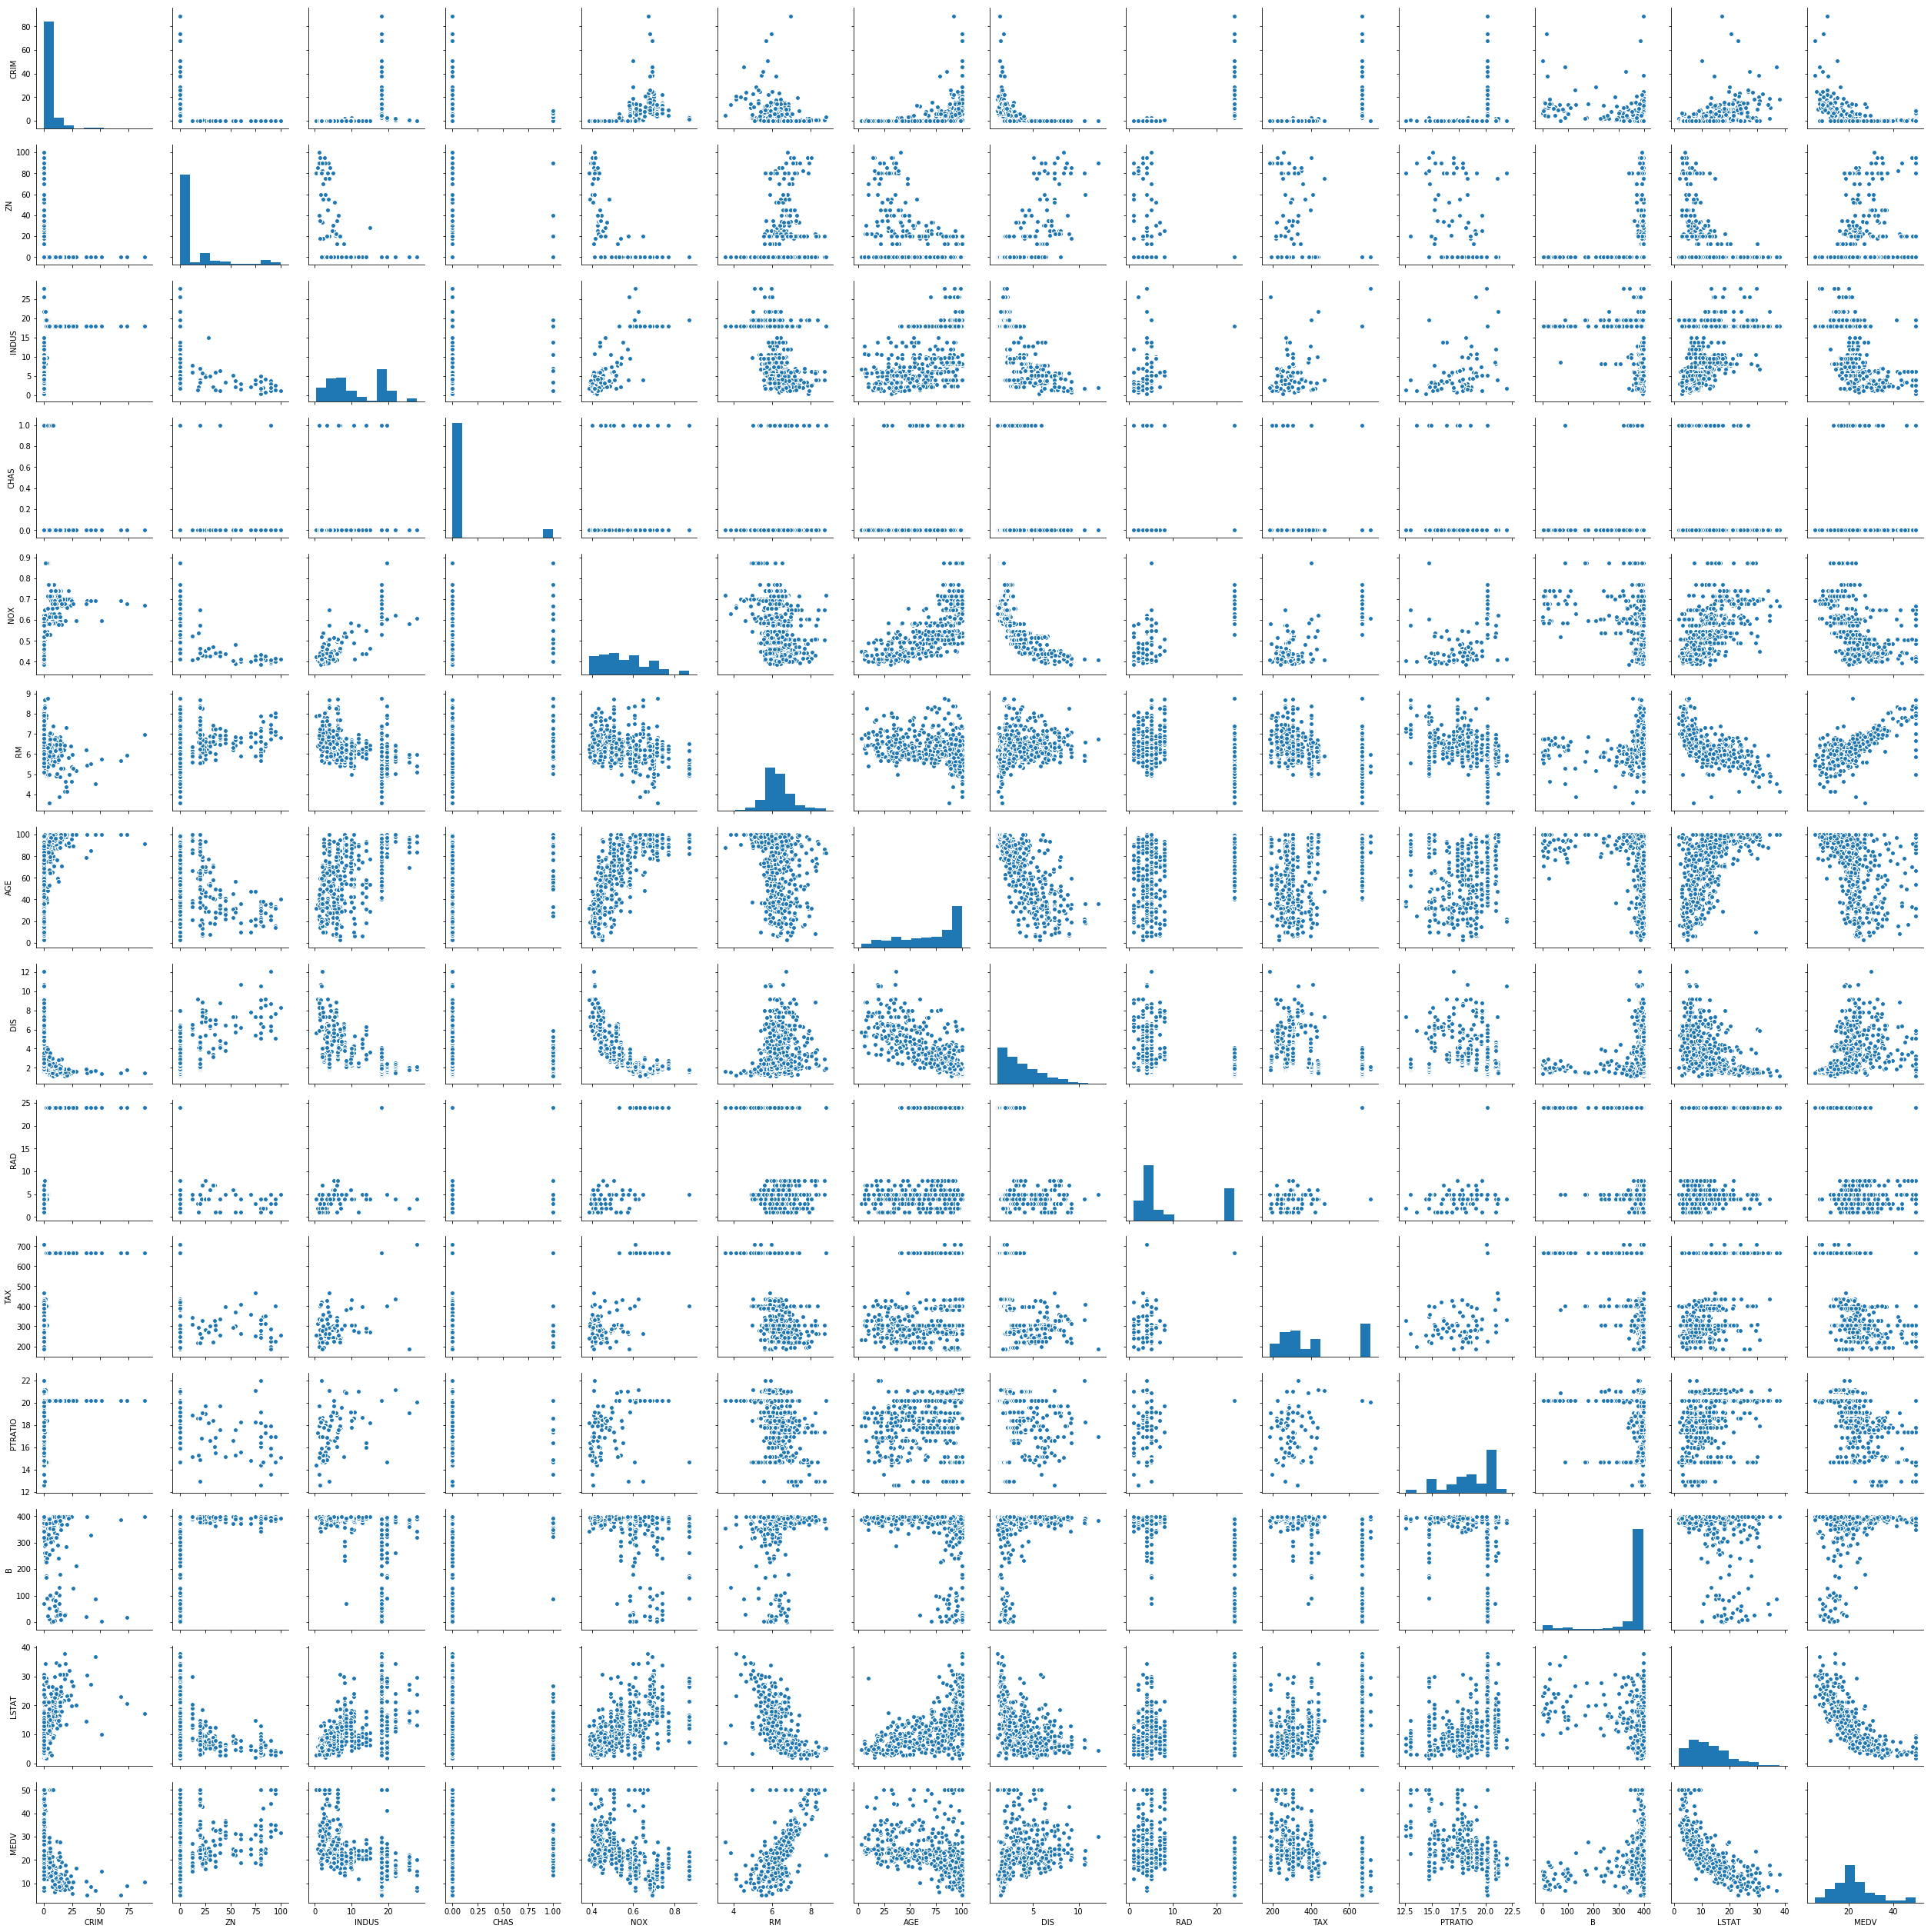

In [9]:
sns.pairplot(data[cols])

In [10]:
cols = ['MEDV', 'LSTAT', 'PTRATIO', 'TAX', 'RM', 'NOX', 'INDUS']

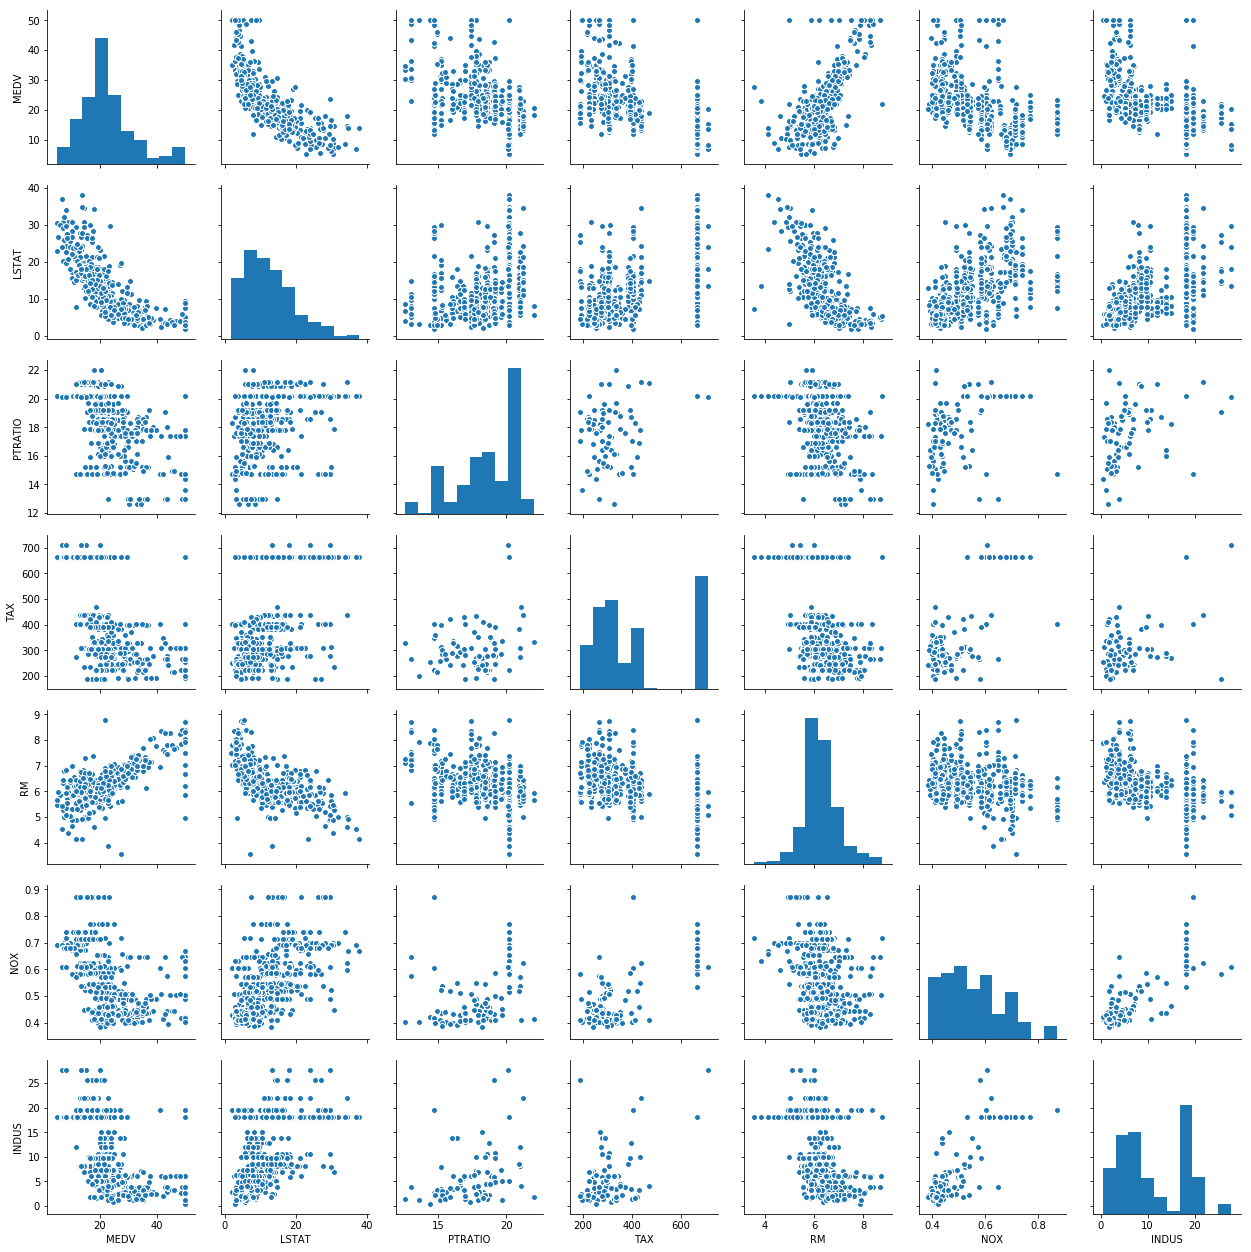

In [11]:
sns.pairplot(data[cols])

In [12]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Testing models with all columns and with selected

In [14]:
X1_train = X_train
X1_test = X_test
X2_train = X_train[['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX','NOX']]
X2_test = X_test[['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX','NOX']]

In [15]:
for i in range(10):
    lr1 = LinearRegression(normalize=True)
    lr1.fit(X1_train, y_train)
    score_all_columns = lr1.score(X1_test, y_test)
    lr2 = LinearRegression(normalize=True)
    lr2.fit(X2_train, y_train)
    score_selected_columns = lr2.score(X2_test, y_test)
    print(score_all_columns)
    print(score_selected_columns)
    print('\n')

0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925


0.7341758467596531
0.6720847344118925




## Eliminating outliers

In [16]:
data1 = data[['LSTAT', 'MEDV']].copy()

In [17]:
data1

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
5,5.21,28.7
6,12.43,22.9
7,19.15,27.1
8,29.93,16.5
9,17.10,18.9


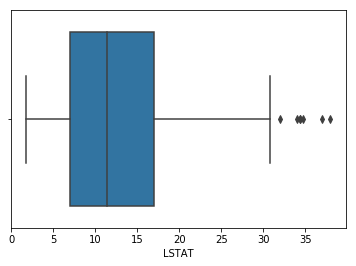

In [18]:
sns.boxplot(data['LSTAT'])

In [21]:
X = data1['LSTAT'].values.reshape(-1,1)

In [22]:
y = data1['MEDV'].values.reshape(-1,1)

In [23]:
lr3 = LinearRegression()

In [26]:
lr3.fit(X, y)
lr3.score(X, y)

0.5441462975864799

## z-score method

In [27]:
from scipy import stats

In [28]:
z = np.abs(stats.zscore(data1))
treshold = 3
data1_z = data1[(z < treshold).all(axis=1)]
len(data1_z)

501

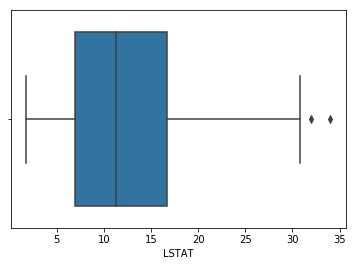

In [29]:
sns.boxplot(data1_z['LSTAT'])

In [30]:
X = data1_z['LSTAT'].values.reshape(-1,1)
y = data1_z['MEDV'].values.reshape(-1,1)
lr_z = LinearRegression()
lr_z.fit(X, y)
lr_z.score(X, y)

0.561613442074578

## IQR method

In [31]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)

In [32]:
IQR = Q3 - Q1

In [37]:
outlier_condition = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > Q3 + 1.5 * IQR))

In [41]:
data1_iqr = data1[~outlier_condition.any(axis=1)]
len(data1_iqr)

459

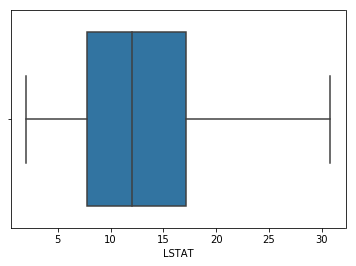

In [42]:
sns.boxplot(data1_iqr['LSTAT'])

In [43]:
X = data1_iqr['LSTAT'].values.reshape(-1,1)
y = data1_iqr['MEDV'].values.reshape(-1,1)
lr_iqr = LinearRegression()
lr_iqr.fit(X, y)
lr_iqr.score(X, y)

0.6087730602029617